# 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# 2. Reading dataset



The data is loaded as a pandas dataframe

In [2]:
df = pd.read_csv('QS university Ranking 2017 to 2022.csv')

# 3. Exploring Dataset


The dataset contains 15 columns
The name of the university
The ranking year
The university rank for the year
The rank score of the university
The unversity link
The country were the university is located
The city the university is located
The region (continent) where university is located The logo of the university
The type of the university based on ownership
The research output level of each university
The ratio of student to faculty
The number of international students
The size of the university
The number of faculty members in the university

In [3]:
#Let us examine the dataset

df.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [4]:
#length of the dataset

len(df)

6482

In [5]:
#checking for dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [6]:
#shape of the dataset
df.shape

(6482, 15)

# 4 DATA CLEANING

In [7]:
#Data cleaning
#Lets us see the number of missing values

pd.DataFrame(df.isnull().sum(), columns=['No. of Missing values'])

,No. of Missing values
university,0
year,0
rank_display,68
score,3662
link,0
country,0
city,178
region,0
logo,0
type,12


We dropped the link and logo column because it is an hyperlink since they are not useful to this study

In [8]:
 df.drop(['link', 'logo'], axis=1, inplace=True)

Converting faculty_count and international_student columns to numeric variables for easy analysis

In [9]:
df['faculty_count'] = df.faculty_count.str.replace(r'\W+','').astype(float) 
df['international_students'] = df.international_students.str.replace(r'\W+','').astype(float)

C:\Users\USER\AppData\Local\Temp/ipykernel_5468/3688982947.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['faculty_count'] = df.faculty_count.str.replace(r'\W+','').astype(float)
C:\Users\USER\AppData\Local\Temp/ipykernel_5468/3688982947.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['international_students'] = df.international_students.str.replace(r'\W+','').astype(float)


In [20]:
df['research_output'] = df['research_output'].replace(['Very high'],'Very High')

In [21]:
df.head()

,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,United States,Cambridge,North America,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,98.7,United States,Stanford,North America,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3,98.3,United States,Cambridge,North America,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4,97.2,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5,96.9,United States,Pasadena,North America,Private,Very High,2.0,692.0,S,968.0


# 5. Computing and Visualizing of Dataset

In [22]:
#creating a pandas pivot table to count the number of univerties ranked per year
year_counts = df.pivot_table(values = "university", index = "year", aggfunc = "count")


#confirming data
year_counts.head()

,university
year,
2017,933
2018,977
2019,1018
2020,1069
2021,1185


<AxesSubplot:xlabel='year'>

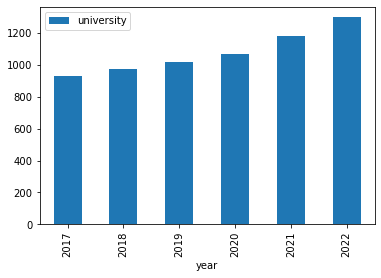

In [23]:
#A bar chart to visualize the number of universities ranked per year

year_counts.plot.bar()


We can see an increase in the number of university ranked per year from 2017 to 2022

In [24]:
#let's ascertain the number of universities that appeared the most in the 6 years ranking

university_count = df.pivot_table(values = "year", index ="university", aggfunc ="count")
university_count.sort_values(by = "year", inplace = True, ascending = False)
university_count.columns = ["Numbers of time ranked"]

university_count.head()

,Numbers of time ranked
university,
Technical University of Darmstadt,6
Universidad de Chile,6
Universidad Panamericana (UP),6
Universidad Peruana Cayetano Heredia (UPCH),6
Universidad Politécnica de Madrid (UPM),6


over 700 uniiversities appeared in all 6 years of the ranking; Due to the large number of university, let us group them into country and region


In [25]:
#Number of countires represented

df['country'].nunique()

97

97 countries were duely represented on the ranking in 6 years

In [26]:
countries = df['country'].value_counts()
countries

United States           968
United Kingdom          497
Germany                 278
China (Mainland)        263
Japan                   262
                       ... 
Syrian Arab Republic      2
Cyprus                    2
Sudan                     2
Armenia                   1
Honduras                  1
Name: country, Length: 97, dtype: int64

<AxesSubplot:xlabel='count', ylabel='country'>

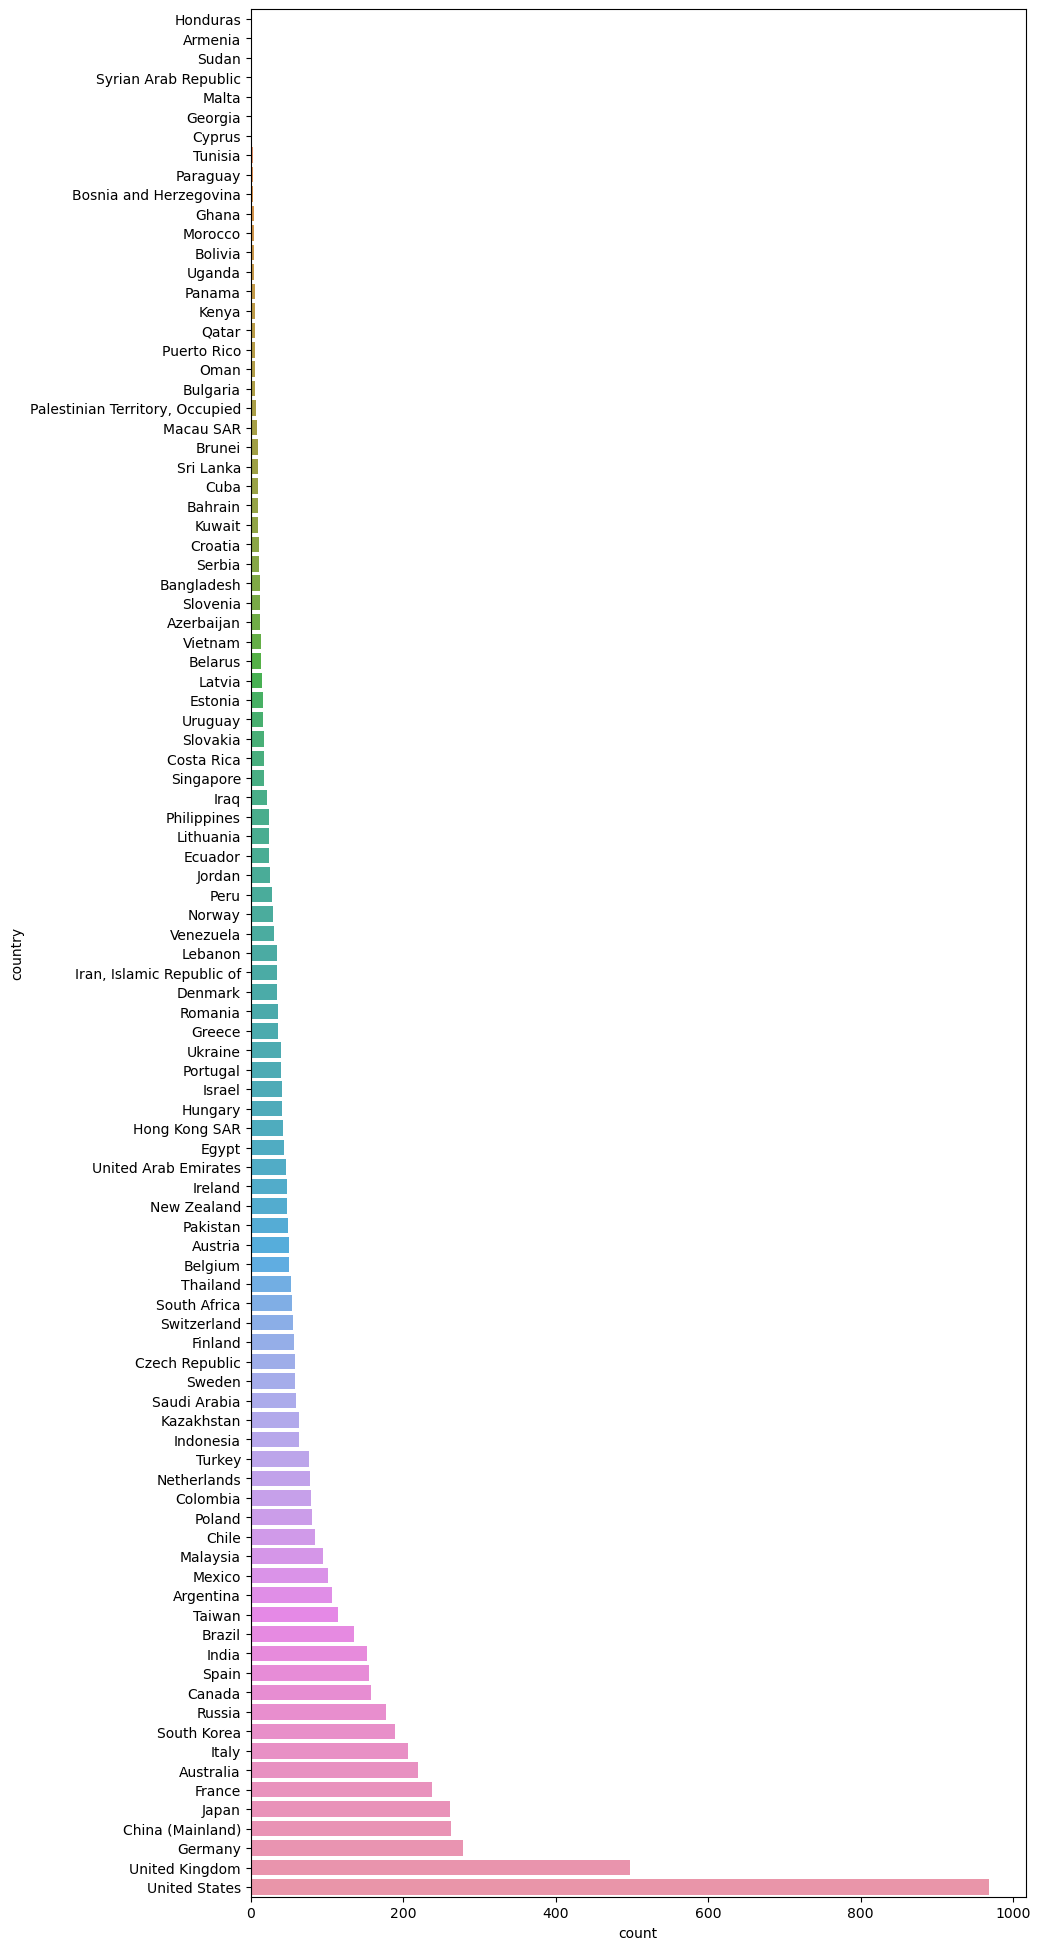

In [27]:
#Number of universities ranked per country
fig, AX = plt.subplots(figsize=(10,25), dpi=100)
sns.countplot(data=df, y='country', order=df.country.value_counts(ascending=True).index)

The graph above shows that US is the most represented country on the list with 968 entries followed by the Uk and Germany in second and third respectively

<AxesSubplot:xlabel='region', ylabel='count'>

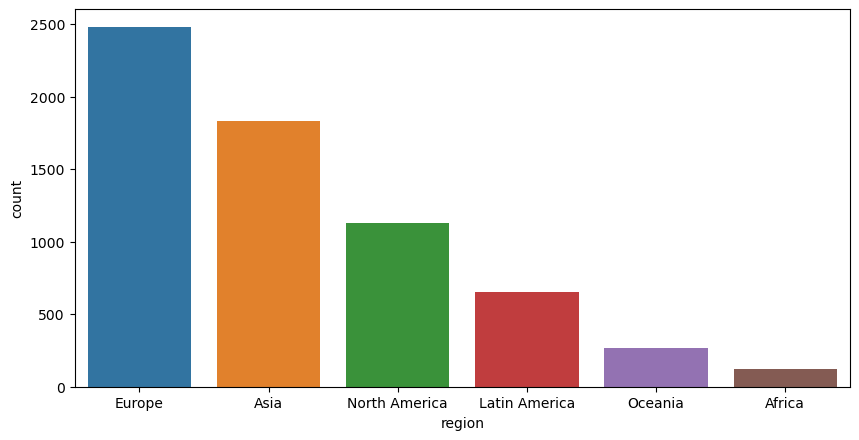

In [29]:
#University count by region

fig, AX = plt.subplots(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='region', order=df.region.value_counts().index)

This shows that European universities are the most ranked university while African universities are the least ranked between 2017 and 2022

It is paramount to examine the universty type (Ownership) as it gives more insight

In [30]:
#our data shows the university type-private or public- it is important to analyse this column 

university_type = df['type'].value_counts()
university_type

Public     5284
Private    1186
Name: type, dtype: int64

<AxesSubplot:title={'center':'University type'}>

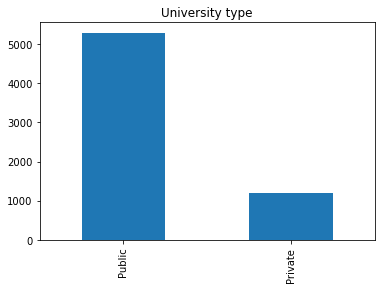

In [18]:
#A bar showing the two types of universities on the rank list

university_type.plot(kind='bar', title='University type')

This shows that in the 6 years under review, over 5000 public universities were ranked while less than 1500 private universities made the list

Text(0.5, 0.98, 'Research output of universities')

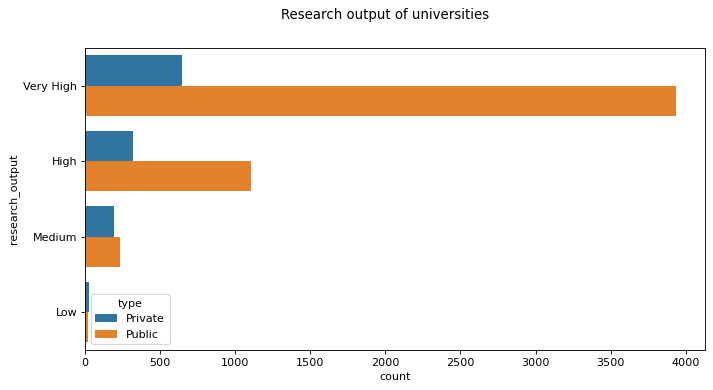

In [31]:
#the level of university output against the university type

fig, ax = plt.subplots(figsize=(10,5), dpi=80)
sns.countplot(data=df, y='research_output', hue='type')
fig.suptitle('Research output of universities')

The chart shows that public universities has more research output compared to private universities

<AxesSubplot:xlabel='student_faculty_ratio', ylabel='Count'>

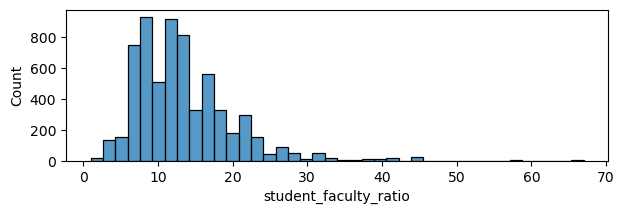

In [32]:
#a chart showing the count ratio of student to faculty

plt.figure(figsize=(7,2), dpi=100)
sns.histplot(data=df, x='student_faculty_ratio', bins=40)

This shows that majority of the university have a student faculty ration between 7 and 12 

<Figure size 800x400 with 0 Axes>

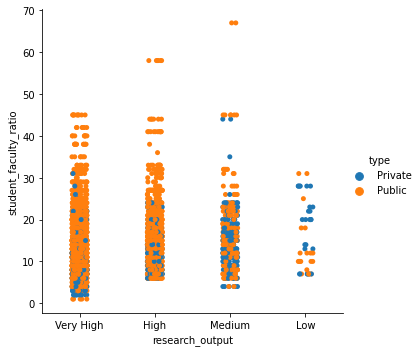

In [33]:
plt.figure(figsize=(8,4), dpi=100)
sns.catplot(data=df, y='student_faculty_ratio', x='research_output', hue='type')

This shows that universities with high/meduim research output has better student faculty ratio

<Figure size 800x400 with 0 Axes>

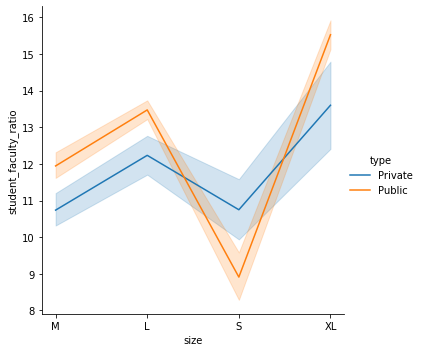

In [105]:
#student_faculty_ratio against size and type of university
plt.figure(figsize=(8,4), dpi=100)
sns.relplot(data=df, kind="line", x="size", y="student_faculty_ratio",  hue='type')

university size determines the student faculty ratio while pulic universities have more faculty to student ratio

<AxesSubplot:xlabel='international_students', ylabel='Count'>

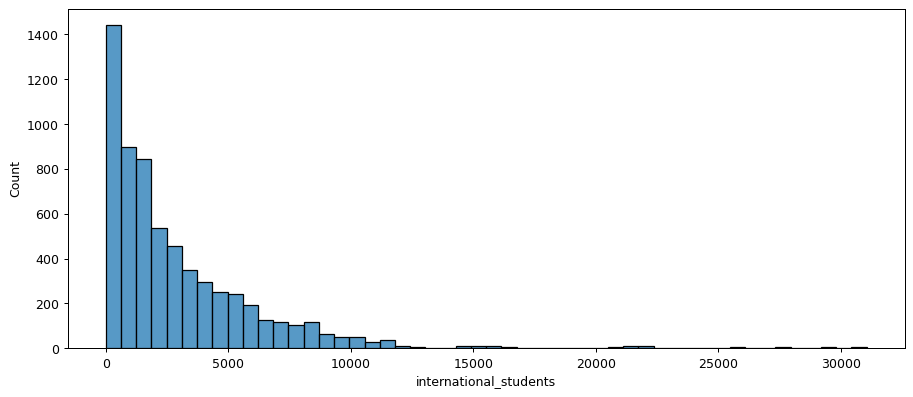

In [165]:
#International student counts

plt.figure(figsize=(12,5), dpi=90)
sns.histplot(data=df, x='international_students', bins=50)

the number of international students in the 6 years period peaked around 3000 

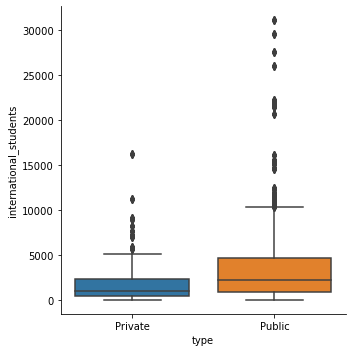

In [166]:
sns.catplot(x="type", y="international_students", kind="box", data=df)

This chart shows that majority of international student opt for pubic university 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 800x400 with 0 Axes>

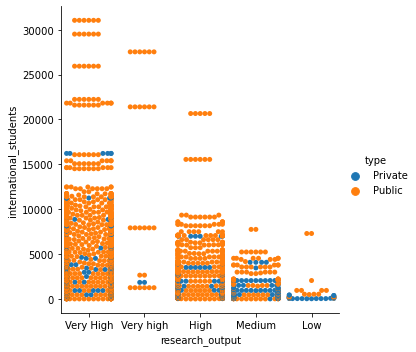

In [138]:
plt.figure(figsize=(8,4), dpi=100)
sns.catplot(data=df, kind="swarm", x="research_output", y="international_students",  hue='type')

this shows that international students attend public universities with very high research output

# Conclusion

This project analyzed the QS 2017 to 2022 university world ranking. The study found that more public owned university were ranked, they have high research output which is a major reason international students opt for them. Our study also found that the size of a university determines the student to faculty ratio, a smaller university has a small ratio while extra large universities have larger ratio. Simialar, we found that more european universties made the list while Africa produced the least number of universities.